## Abstract: This notebook is used for the Final capstone project


Check List

Project organization
· README file with a summary of findings and link to your Jupyter Notebook (yes)
· Jupyter Notebook with headings and text appropriately formatted (yes)
· No unnecessary files (yes)
· Directories and files with appropriate names and location (yes)
    Directorie
        Directorie media contains graphs and Images
        Directorie melanoma-classification_data contains graphs and Images
        Sub Directorie jpeg in melanoma-classification_data contains processed images matching Blanced CSV  file
    files:
        For_my_capstone_project.pdf contains origanl text submited for the projetc.
        Raj_Capstone.ipynb contains Pythone code
        README_Org.md contains the update project discription and static text for the project
        output.md contains dynamly genrated analyses and information for the project
        README.md contains concated out putr form README_Org.md and output.md

Syntax and code quality
· Imports and names libraries correctly (yes)
· Code with no errors  (yes)
· No long strings of code output (yes)
· Demonstrates competency with pandas (yes)
· Demonstrates competency with seaborn (yes throught out the course)
· Appropriate use of comments to explain code (yes to my bets effort)
· Sensible variables (yes)

This criterion is linked to a Learning OutcomeVisualizations
· Appropriate plots for categorical variables (yes)
· Plots with human-readable labels (yes)
· Plots with descriptive titles (yes)
· Legible axes (yes)
· Appropriate use of subplots when necessary (yes)
· Plots that are scaled appropriately for readability (yes)

This criterion is linked to a Learning OutcomeModeling
· Multiple  classification models
· Cross-validation of models
· Grid Search hyperparameters
· Appropriate interpretation of models
· Appropriate interpretation of evaluation metric
· Clear identification of evaluation metric
· Clear rationale for use of given evaluation metric

This criterion is linked to a Learning OutcomeFindings
· Clearly states business understanding of the problem
· Clean and organized notebook with data cleaning
· Correct and concise interpretation of descriptive and inferential statistics
· Clearly states findings in their own section with actionable items highlighted in appropriate language for a nontechnical audience
· Next steps and recommendations

In [ ]:
import os
import io
import shutil

import pandas as pd
import numpy as np
from scipy.stats import mode

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


import base64

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Utlity functios


In [ ]:
class FileWriter:
    def __init__(self, filename):
        self.filename = filename

    def __enter__(self):
        self.file = open(self.filename, 'a')
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.file.close()

    def append_to_file(self, text):
        self.file.write(text + '\n')

    # def Creat_file(self,text)
    #      with open(output_file, "w") as outfile:

In [ ]:
def Write_Readme_file():
    
    # names of the files to be concatenated
    file1 = "README_Org.md"
    file2 = "output.md"

    # name of the output file
    output_file = "README.md"

    # open the output file in write mode
    with open(output_file, "w") as outfile:
        # open the first file in read mode
        with open(file1, "r") as infile:
            # write its contents to the output file
            content = infile.read()
            # print(f"Content of {file1}:")
            # print(content)
            outfile.write(content)

        # write a newline to separate the contents of the two files
        outfile.write("\n")

        # open the second file in read mode
        with open(file2, "r") as infile:
            # write its contents to the output file
            content = infile.read()
            # print(f"Content of {file2}:")
            # print(content)
            outfile.write(content)
    outfile.close()
    

In [ ]:

class Visualize_process_dataset:
    def __init__(self, Image_fiel_path,csv_file_path,Org_csv_file,Balaced_csv_file, corrupt_dir, output_csv):
        
        self.df = pd.read_csv(self.Org_csv_file)
        self.corrupt_dir = corrupt_dir
        self.output_csv = output_csv
        self.Org_csv_file = Org_csv_file
        self.Image_fiel_path = Image_fiel_path

    def Rename_colum(self,Nem_colum_name):
        self.df.rename(columns=Nem_colum_name, inplace=True) # rename column name


A balanced dataset for image categorization means that there are roughly equal numbers of images for each class or category in the dataset. You can check the balance of your dataset by counting the number of instances of each class




### Examine the dataset and balance the dataset.

In [ ]:
class BlanceDataste:
    def __init__(self, df, output_csv, featuresList):
        self.df = df
        self.output_csv = output_csv
        self.featuresList = featuresList
        print(self.featuresList)

    def process_Data(self):
        try:
            # Separate features and target variables
             features = self.df.drop(self.featuresList, axis=1)  # Replace with your actual column names
             targets = self.df[self.featuresList]  # Replace with your actual column names
             print(features)
             print(targets)

        # Perform balancing for each target variable separately
             balanced_features = []
             balanced_targets = []

             for column in targets.columns:
                target = targets[column]
                
                # Perform undersampling
                undersampler = RandomUnderSampler(sampling_strategy='majority')
                features_undersampled, target_undersampled = undersampler.fit_resample(features, target)
                
                # Perform oversampling on the undersampled data
                oversampler = RandomOverSampler(sampling_strategy='minority')
                features_balanced, target_balanced = oversampler.fit_resample(features_undersampled, target_undersampled)
                
                balanced_features.append(features_balanced)
                balanced_targets.append(target_balanced)

                # Create a new DataFrame with balanced data
                balanced_df = pd.concat([pd.DataFrame(feature) for feature in balanced_features] + [pd.DataFrame(target) for target in balanced_targets], axis=1)

                # Write the balanced data to a new CSV file
                balanced_df.to_csv(self.output_csv, index=False)
                
        except IOError:
                    print(f"Error creating image {self.output_csv}")
                    return False
        return True
    





In [ ]:
import base64



class DataCleaner:
    def __init__(self, df, label):
        self.df = df
        self.scaler = StandardScaler()
        self.encoder = LabelEncoder()
        self.outfutfile = "output.md"
        self.label = label
        

       
    def report_and_recommend(self):
        
        title = ("\n Recommendations:")
        with FileWriter(self.outfutfile ) as writer:
            writer.append_to_file(title)
            for column in self.df.columns:
                if self.df[column].isnull().sum() > 0:
                        writer.append_to_file(f" \n  Column '{column}' has missing values. Consider using dropna() or fillna().")
                            

                if self.df[column].dtype == 'object':
                        writer.append_to_file(f" \n  Column '{column}' is categorical. Consider encoding it using label encoding or one-hot encoding.")


                elif self.df[column].dtype in ['int64', 'float64']:
                        writer.append_to_file(f" \n  Column '{column}' is numerical. Consider scaling it using standard scaling or min-max scaling.")
        
            writer.append_to_file("\n Recommendations - END -:")        
   
    def visualize(self, column):
               
            if self.df[column].dtype in ['int64', 'float64']:

                fname = f"media//Histogram_of_{self.label}_{column}.png" 
                ax = sns.histplot(self.df[column])
                ax.set_title(f"Histogram of _{self.label}_{column}")

                plt.xticks(rotation=90) 
                plt.xlabel(column)
                plt.savefig(fname)

                with FileWriter(self.outfutfile ) as writer:
                    markdown_image_syntax = f"![Image]({fname})\n"
                    writer.append_to_file(markdown_image_syntax) 
                # plt.show()
               
                
            else:

                fname = f"media//Count_plot_of_{self.label}_{column}.png"
                ax = sns.countplot(x=column, data=self.df)
                ax.set_title(f"Count plot of _{self.label}_{column}")
                plt.xticks(rotation=90) 
                plt.savefig(fname)

                with FileWriter(self.outfutfile ) as writer:
                    markdown_image_syntax = f"![Image]({fname})\n"
                    writer.append_to_file(markdown_image_syntax)
                    
                # plt.show()
                
                
           
            
   
    def drop_missing(self):
        self.df.dropna(inplace=True)

    def fill_missing(self, column, value):
        self.df[column].fillna(value, inplace=True)

    def encode_categorical(self, column):
        self.df[column] = self.encoder.fit_transform(self.df[column])

    def scale_numerical(self, column):
        self.df[column] = self.scaler.fit_transform(self.df[column].values.reshape(-1, 1))

    def fill_missing_numeric_With_mean(self, column1, column2):
        # Calculate the mean of 'column1' for each category in 'column2'
        mean_values = self.df.groupby(column2)[column1].mean()

        # Fill the missing values in 'column1' with the mean of 'column1' in the same category in 'column2'
        self.df[column1] = self.df.apply(
             lambda row: mean_values[row[column2]] if pd.isnull(row[column1]) else row[column1],axis=1)
        
    def fill_missing_Category_values(self, column1, column2):
       
        # # Define a lambda function to compute the mode
        fill_mode = lambda x: x.fillna(x.mode().iloc[0])

        # # Fill missing values in column1 column with the mode of the corresponding group in column2
        self.df[column1] = self.df.groupby(column2)[column1].transform(fill_mode)
        
        
       

       


In [ ]:
class removeCorruptImage:
    def __init__(self, Image_fiel_path, df, corrupt_dir, output_csv ):
        self.df = df
        self.corrupt_dir = corrupt_dir
        self.output_csv = output_csv
        self.Image_fiel_path = Image_fiel_path
        self.outfutfile = "output.md"
        
    def is_corrupt(self, file_path):
        try:
            Image.open(file_path)
        except IOError:
            return True
        return False
    
    def process_images(self): 
        
        count = 0
        ccount = 0
        for index, row in self.df.iterrows():
            count = count + 1
            file_name = row['image_name'] +'.jpg'
            row_image_file = os.path.join(self.Image_fiel_path, file_name)
            if self.is_corrupt(row_image_file):
                cccount = cccount +1
                shutil.move(row_image_file, self.corrupt_dir)  # Move corrupt files to a separate directory
                self.df.drop(index, inplace=True)  # Remove the row from the DataFrame
               
                        
            pass
        
        with FileWriter(self.outfutfile ) as writer:
                    writer.append_to_file("\n ------------  -----------------  --------------   --------------\n")
                    Message1 = f" ### proces directery to see if there is any currept imges"
                    writer.append_to_file(Message1)
                    Message = f" \n Total Image file count is {count} \n Total currept imge files count is {ccount}\n"
                    writer.append_to_file(Message)

        
    

In [ ]:
import cv2
import numpy as np

class BlanceImages:
    def __init__(self, Image_fiel_path, df, FinalImage_dir, output_csv,  size=(128, 128) ):
        self.df = df
        self.FinalImage_dir = FinalImage_dir
        self.output_csv = output_csv
        self.Image_fiel_path = Image_fiel_path
        self.size = size 

    def process_image(self, file_path, newfile):

        try:
            img = Image.open(file_path)
            img = img.resize(self.size)  # Resize image
            # Convert image to numpy array
            img_array = np.array(img)

            # Normalize to [0,1]
            img_normalized = img_array / 255.
           # Convert back to image
            img = Image.fromarray((img_normalized * 255).astype(np.uint8))
            img.save(newfile)
            
        except IOError:
            print(f"Error processing image {file_path}")
            return False
        return True 

    def process_images(self): 
        
        for index, row in self.df.iterrows():
            file_name = row['image_name'] +'.jpg'
            row_image_file = os.path.join(self.Image_fiel_path, file_name)
            newfile =  os.path.join(self.FinalImage_dir, file_name)

            self.process_image(row_image_file, newfile)
                        
            pass
        
        # self.df.to_csv(self.output_csv,index=False) 

In [ ]:
class removeCorruptImage:
    def __init__(self, Image_fiel_path, df, corrupt_dir, output_csv ):
        self.df = df
        self.corrupt_dir = corrupt_dir
        self.output_csv = output_csv
        self.Image_fiel_path = Image_fiel_path
        self.outfutfile = "output.md"
        
    def is_corrupt(self, file_path):
        try:
            Image.open(file_path)
        except IOError:
            return True
        return False
    
    def process_images(self): 
        
        count = 0
        ccount = 0
        for index, row in self.df.iterrows():
            count = count + 1
            file_name = row['image_name'] +'.jpg'
            row_image_file = os.path.join(self.Image_fiel_path, file_name)
            if self.is_corrupt(row_image_file):
                cccount = cccount +1
                shutil.move(row_image_file, self.corrupt_dir)  # Move corrupt files to a separate directory
                self.df.drop(index, inplace=True)  # Remove the row from the DataFrame
               
                        
            pass
        
        with FileWriter(self.outfutfile ) as writer:
                    writer.append_to_file("\n ------------  -----------------  --------------   --------------\n")
                    Message1 = f" ### proces directery to see if there is any currept imges"
                    writer.append_to_file(Message1)
                    Message = f" \n Total Image file count is {count} \n Total currept imge files count is {ccount}\n"
                    writer.append_to_file(Message)

        
    

In [ ]:
class DF_Comparison:
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2
        self.outfutfile = "output.md"

       
    def report(self):

        with open(self.outfutfile , 'w'):
             pass

        self.print_info(self.df1,"\n ## DataFrame info befor process :")
        self.print_Missing_values(self.df1,"\n ## Missing values befor & aftre  process :")
             
        # print("\nUnique values df1 - df2:")
        title = "\n ## Unique values befor & aftre  process :"
        self.print_unique_values(title)

        self.print_value_count("\n ## Value counts befor & aftre  process :")
        title = "\n ## Descriptive statistics befor and after the process:"



        # Getting the description of both DataFrames
        desc_df1 = self.df1.describe()
        desc_df2 = self.df2.describe()

        # Combine the two descriptions into one DataFrame
        combined_desc = pd.concat([desc_df1, desc_df2], axis=1)

        markdown_str = combined_desc.to_markdown()

        with FileWriter(self.outfutfile ) as writer:
            writer.append_to_file(title)
            writer.append_to_file(markdown_str)
            writer.append_to_file('\n')

      

        
    def print_info(self,df,title):

        
        # Capture df.info() output in a string
        buf = io.StringIO()
        df.info(buf=buf)
        info_str = buf.getvalue()

        # Create a summary DataFrame
        info_list = info_str.split('\n')[5:-3]  # Remove first and last two lines
        info_data = [line.split() for line in info_list]  # Split each line into list of words
        # Create dataframe from info_data
        info_df = pd.DataFrame(info_data, columns=['index', 'Name', 'Count', 'Non-Null','Dtype'])

        # Print the summary DataFrame in markdown format
        # print(info_df.to_markdown(index=False))
        # print("\n")

        markdown_str = info_df.to_markdown()

        # Write the markdown string to a text file
        with FileWriter(self.outfutfile ) as writer:
            writer.append_to_file(title)
            writer.append_to_file(markdown_str)
            writer.append_to_file('\n')
    
    
    def print_Missing_values(self,df,title):

        # Get the count of null values in each column
        null_counts1 = self.df1.isnull().sum()
        null_counts2 = self.df2.isnull().sum()
        null_counts = pd.DataFrame({'Befor':null_counts1,'After':null_counts2})
        
        with FileWriter(self.outfutfile ) as writer:
             writer.append_to_file(title)
             writer.append_to_file(null_counts.to_markdown())
             writer.append_to_file('\n')

    def print_unique_values(self,title):

        unique_counts1 = self.df1.nunique()
        unique_counts2 = self.df2.nunique()
        unique_counts = pd.DataFrame({'Befor':unique_counts1,'After':unique_counts2})

        #print(unique_counts)    
        # Write the markdown string to a text file
        with FileWriter(self.outfutfile ) as writer:
             writer.append_to_file(title)
             writer.append_to_file(unique_counts.to_markdown())
             writer.append_to_file('\n')

    def print_value_count(self,title):

        # Create an empty DataFrame to store the results
        result = pd.DataFrame()
        
        # Iterate over each column
        for column in self.df1.columns:

            if self.df1[column].nunique() > 8:
                continue

            df1_counts = self.df1[column].value_counts()
            df2_counts = self.df2[column].value_counts()

            # Combine the two Series into a DataFrame
            temp_df = pd.concat([df1_counts, df2_counts], axis=1, keys=['DF1', 'DF2'])

            # Add the column name to the DataFrame
            temp_df['Column'] = column

            # Append the temporary DataFrame to the result DataFrame
            
            result = pd.concat([result, temp_df])
            

        # Reset the index of the result DataFrame
        result.reset_index(inplace=True)

        # Rename the columns for clarity
        result.columns = ['Value', 'Count Befor', 'Count After', 'Column']

        # Rearrange the columns
        result = result[['Column', 'Value', 'Count Befor', 'Count After']]

        with FileWriter(self.outfutfile ) as writer:
             writer.append_to_file(title)
             writer.append_to_file(result.to_markdown())
             writer.append_to_file('\n')

        


        


apply LabelEncoder 

In [ ]:

class DF_apply_LabelEncoder:
    def __init__(self, df, colName):
        self.df = df
        self.colName = colName
        self.outfutfile = "output.md"

    def encode(self):
    # Label Encoding
        label_encoder = LabelEncoder()
        Label = self.colName + "_" + "encoded"
        self.df[Label] = label_encoder.fit_transform(self.df[self.colName])
    # Return the transformed DataFrame
        return self.df


In [ ]:
class DF_apply_StandardScaler:
    def __init__(self, df, colName):
        self.df = df
        self.colName = colName
        self.outfutfile = "output.md"

    def encode(self):
    # Label Encoding
        scaler = StandardScaler()
        Label = self.colName + "_" + "encoded"
        self.df[Label] = scaler.fit_transform(self.df[self.colName])
    # Return the transformed DataFrame
        return self.df

['benign_malignant']
         image_name  patient_id     sex  age_approx    anatomy_sites  \
0      ISIC_2637011  IP_7279968    male        45.0        head/neck   
1      ISIC_0015719  IP_3075186  female        45.0  upper extremity   
2      ISIC_0052212  IP_2842074  female        50.0  lower extremity   
3      ISIC_0068279  IP_6890425  female        45.0        head/neck   
4      ISIC_0074268  IP_8723313  female        55.0  upper extremity   
...             ...         ...     ...         ...              ...   
33121  ISIC_9999134  IP_6526534    male        50.0            torso   
33122  ISIC_9999320  IP_3650745    male        65.0            torso   
33123  ISIC_9999515  IP_2026598    male        20.0  lower extremity   
33124  ISIC_9999666  IP_7702038    male        50.0  lower extremity   
33125  ISIC_9999806  IP_0046310    male        45.0            torso   

      diagnosis  target  
0       unknown       0  
1       unknown       0  
2         nevus       0  
3       un

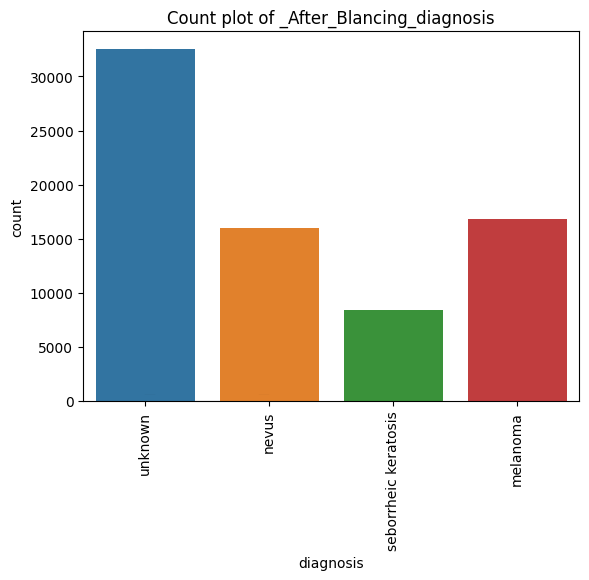

In [20]:
# Define row CSV file name and path

# Current directory
current_dir = os.getcwd()
# Parent directory
parent_dir = os.path.dirname(current_dir)



Data_path_Name= 'melanoma-classification_data/'
Train_File_name_pre = 'train_pre.csv'
Train_Uncurept_Image_File_Name = 'train_UImage.csv'
Test_File_name_pre = 'test_pre.csv'

Image_File_Path_pre_train = os.path.join(parent_dir, '\\Train')
Image_File_Path_post_train = os.path.join(current_dir, 'melanoma-classification_data\jpeg\Train')

Org_csv_file = os.path.join(Data_path_Name, Train_File_name_pre)
Post_scv_file = os.path.join(Data_path_Name, Train_Uncurept_Image_File_Name)
md_file = os.path.join(current_dir, 'output.md')
os.remove(md_file)

Train_cleand_csv_File = 'Blanced.csv'
Blanced_csv_file = os.path.join(Data_path_Name, Train_cleand_csv_File)

df_org  = pd.read_csv(Org_csv_file)

# # rename long column name anatom_site_general_challenge to short name anatomy_sites
df_org.rename(columns={"anatom_site_general_challenge": "anatomy_sites"}, inplace=True) # rename column name

# # # #  if there any currupt Image files Remove them and cetar new csv file
processor = removeCorruptImage(Image_File_Path_pre_train , df_org , 'corrupt_files', Post_scv_file)
processor.process_images()

df_UImage = processor.df.copy()

# # Create a blanced dataset arount benign_malignant feature

featuresList = ['benign_malignant']
Blancer = BlanceDataste(df_UImage,Blanced_csv_file,featuresList)
Blancer.process_Data()

df_Blanced  = pd.read_csv(Blanced_csv_file)

DF_ComparisonX = DF_Comparison(df_UImage, df_Blanced)
DF_ComparisonX.report()

cleaner_1 = DataCleaner(df_UImage, 'Befro_Blancing')


cleaner_1.visualize('sex')
cleaner_1.visualize('age_approx')
cleaner_1.visualize('anatomy_sites')
cleaner_1.visualize('target')
cleaner_1.visualize('benign_malignant')
cleaner_1.visualize('diagnosis')

cleaner_2 = DataCleaner(df_Blanced, 'After_Blancing')

# fill in miising values
cleaner_2.fill_missing_numeric_With_mean('age_approx', 'diagnosis')
cleaner_2.fill_missing_Category_values('anatomy_sites', 'diagnosis')
cleaner_2.fill_missing_Category_values('sex', 'diagnosis')

cleaner_2.visualize('sex')
cleaner_2.visualize('age_approx')
cleaner_2.visualize('anatomy_sites')
cleaner_2.visualize('target')
cleaner_2.visualize('benign_malignant')
cleaner_2.visualize('diagnosis')

cleaner_2.report_and_recommend()

Write_Readme_file()

Blanced_df =  DF_apply_LabelEncoder(cleaner_2.df, 'diagnosis').encode()
Blanced_df =  DF_apply_LabelEncoder(Blanced_df, 'anatomy_sites').encode()
Blanced_df =  DF_apply_LabelEncoder(Blanced_df, 'sex').encode()
Blanced_df =  DF_apply_LabelEncoder(Blanced_df, 'benign_malignant').encode()
Blanced_df['age_approx'] = Blanced_df['age_approx'].astype(int)

# process and Move images from balnsed dataset to new folders

BIamges = BlanceImages(Image_File_Path_pre_train,Blanced_df,Image_File_Path_post_train,Post_scv_file)
BIamges.process_images()

# print(Blanced_df.info())
# print(df_org.info())





# add semple Images befor resizing to README









